In [15]:
!unzip drive/MyDrive/Datasets/archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [18]:
RES = 100
CHANNEL = 3
train_dir = "/content/fruits-360/Training/"
test_dir = "/content/fruits-360/Test/"

train_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_gen = train_datagen.flow_from_directory(train_dir, batch_size=100, class_mode='categorical', target_size=(RES, RES))
test_gen = test_datagen.flow_from_directory(test_dir, batch_size=100, class_mode='categorical', target_size=(RES, RES))

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential([
        Conv2D(64, (3, 3), padding="same", activation='relu', input_shape=(RES, RES, CHANNEL)),
        Conv2D(64, (3, 3), padding="same", activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(128, (3, 3), padding="same", activation='relu'),
        Conv2D(128, (3, 3), padding="same", activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(256, (3, 3), padding="same", activation='relu'),
        Conv2D(256, (3, 3), padding="same", activation='relu'),
        Conv2D(256, (3, 3), padding="same", activation='relu'),
        MaxPooling2D(2, 2),

        Conv2D(512, (3, 3), padding="same", activation='relu'),
        Conv2D(512, (3, 3), padding="same", activation='relu'),
        Conv2D(512, (3, 3), padding="same", activation='relu'),
        MaxPooling2D(2, 2),
        
        Flatten(),
        # Dropout(0.2),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(131, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [50]:
history = model.fit(train_gen, steps_per_epoch=20, epochs=1000 ,validation_data=test_gen, validation_steps=50)

Epoch 1/1000
20/20 [==============================] - 10s 489ms/step - loss: 4.8683 - accuracy: 0.0120 - val_loss: 4.8684 - val_accuracy: 0.0150
Epoch 2/1000
20/20 [==============================] - 9s 479ms/step - loss: 4.8689 - accuracy: 0.0140 - val_loss: 4.8691 - val_accuracy: 0.0148
Epoch 3/1000
20/20 [==============================] - 9s 480ms/step - loss: 4.8649 - accuracy: 0.0130 - val_loss: 4.8615 - val_accuracy: 0.0166
Epoch 4/1000
20/20 [==============================] - 9s 480ms/step - loss: 4.8640 - accuracy: 0.0135 - val_loss: 4.8615 - val_accuracy: 0.0184
Epoch 5/1000
20/20 [==============================] - 9s 479ms/step - loss: 4.8649 - accuracy: 0.0135 - val_loss: 4.8591 - val_accuracy: 0.0146
Epoch 6/1000
20/20 [==============================] - 9s 482ms/step - loss: 4.8617 - accuracy: 0.0170 - val_loss: 4.8609 - val_accuracy: 0.0132
Epoch 7/1000
20/20 [==============================] - 10s 484ms/step - loss: 4.8606 - accuracy: 0.0125 - val_loss: 4.8617 - val_accurac

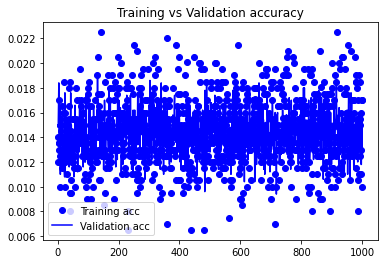

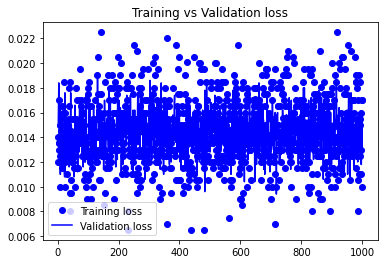

<Figure size 432x288 with 0 Axes>

In [51]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

import matplotlib.pyplot as plt

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training vs Validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, acc, 'bo', label='Training loss')
plt.plot(epochs, val_acc, 'b', label='Validation loss')
plt.title('Training vs Validation loss')
plt.legend()
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(100, 100))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  largest = np.amax(classes[0])
  # print(classes[0])
  index_of_largest = np.where(classes[0] == largest)
  print(index_of_largest)

In [ ]:
labels = train_gen.class_indices
from pprint import pprint
pprint(labels)